In [1]:
!pip install catboost
!pip install merf
!pip install shap
!pip install shapash
!pip install tsfresh
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 651.7/651.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 84.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 50.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 68.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 13.4 MB/s eta 0:00:00
  Created wheel for dash-renderer: filename=dash_renderer-1.8.3-py3-none-any.whl size=1013921 sha256=b70102

In [2]:
import pandas as pd
import shap
from merf.merf import MERF
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [3]:
# Read in data, compute features, train model
df = pd.read_csv('/content/Data_yield.csv')

# subset to the following columns: Season, yield, ndvi
df = df[[ 'X', 'Y',
       'Obs_Rice_Yield', 'evi_max', 'evi_min', 'evi_mean', 'evi_count',
       'evi_stdDev', 'evi_variance', 'slope', 'elevation', 'May_Tmax',
       'May_Tmin', 'May_Precipitation', 'June_Tmax', 'June_Tmin',
       'June_Precipitation', 'July_Tmax', 'July_Tmin', 'July_Precipitation',
       'Aug_Tmax', 'Aug_Tmin', 'Aug_Precipitation', 'Sept_Tmax', 'Sept_Tmin',
       'Sept_Precipitation', 'Oct_Tmax', 'Oct_Tmin', 'Oct_Precipitation']]

# subset to the following columns: Season, yield, ndvi
#df = df[['adm1_name', 'Season', 'yield', 'ndvi', 'cpc_tmax', 'esi_4wk', 'chirps', 'cpc_tmin']]

In [4]:
# Instantiate a Random Forest Model
# model = LinearRegression()
model = RandomForestRegressor(n_estimators=200)  # 100 is default value for n_estimators

In [5]:
# Split the dataframe such that we use 80% of the data for training and predict on the remaining 20%
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)
test

,X,Y,Obs_Rice_Yield,evi_max,evi_min,evi_mean,evi_count,evi_stdDev,evi_variance,slope,...,July_Precipitation,Aug_Tmax,Aug_Tmin,Aug_Precipitation,Sept_Tmax,Sept_Tmin,Sept_Precipitation,Oct_Tmax,Oct_Tmin,Oct_Precipitation
40,89,27,1726.111091,12569.502940,10413.986020,11526.333160,2.392866,947.709425,1.636844e+06,0.311107,...,784.604907,23.817588,17.489564,289.213172,23.222470,16.121436,565.573170,23.026309,12.996481,49.078127
120,90,27,1190.000000,12933.570400,9309.661635,11236.209030,5.103164,1320.698049,2.053606e+06,0.312966,...,964.241759,30.482020,24.540649,355.313679,28.757157,22.090217,451.248017,27.628865,18.756751,101.827957
418,92,27,1068.493831,10994.307050,9676.303727,10338.157330,1.640302,633.166617,1.130566e+06,0.356132,...,638.819040,26.755128,19.549466,230.176780,26.210390,18.353629,311.819083,26.186270,15.896815,97.964704
864,90,27,2247.109904,9293.951589,7252.728820,8272.998214,1.583185,1020.077909,2.649332e+06,0.234819,...,261.867935,23.852680,16.348521,392.829846,23.610049,15.318660,101.348748,23.270200,11.792369,100.568755
464,89,27,1245.937249,12141.378700,9461.322109,10785.665200,3.640252,1069.361451,1.448106e+06,0.293486,...,604.251154,25.194606,19.164922,397.870945,25.206842,17.816591,197.522741,22.197264,13.075055,48.742091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,91,27,1149.014036,11642.881480,9517.985685,10608.034380,2.128992,951.682396,1.846229e+06,0.330162,...,527.231272,26.966628,19.944650,224.029693,26.348467,18.608856,321.184062,26.496276,16.103034,67.387881
410,90,28,2704.999979,13222.780570,6503.805726,9923.595103,9.179946,2280.740564,5.752612e+06,0.226636,...,151.804050,19.278904,10.672455,159.926479,18.807101,8.665356,65.010026,15.390030,2.641590,17.964721
699,92,27,1548.913041,11861.968030,10669.948760,11278.835440,2.040819,561.038073,6.560837e+05,0.271580,...,249.627346,19.170868,10.031515,112.834441,18.382331,8.261523,145.332430,17.848953,4.594631,39.444952
246,91,27,1076.000000,10626.208600,9826.188116,10230.127370,1.331479,382.608898,7.722653e+05,0.321058,...,366.794165,25.810350,18.089408,155.968646,25.363304,16.840093,212.624812,25.371999,14.166280,67.834325


In [6]:
feature_names = ['X', 'Y', 'evi_max', 'evi_min', 'evi_mean', 'evi_count',
       'evi_stdDev', 'evi_variance', 'slope', 'elevation', 'May_Tmax',
       'May_Tmin', 'May_Precipitation', 'June_Tmax', 'June_Tmin',
       'June_Precipitation', 'July_Tmax', 'July_Tmin', 'July_Precipitation',
       'Aug_Tmax', 'Aug_Tmin', 'Aug_Precipitation', 'Sept_Tmax', 'Sept_Tmin',
       'Sept_Precipitation', 'Oct_Tmax', 'Oct_Tmin', 'Oct_Precipitation']
X = train[feature_names].values
y = train['Obs_Rice_Yield'].ravel()
X_test = test[feature_names].values
y_test = test['Obs_Rice_Yield'].ravel()

# Fit the model
model.fit(X, y)
y_pred = pd.DataFrame(model.predict(X_test),columns=['Obs_Rice_Yield'],index=test.index)
y_pred

<ipython-input-6-f283c06f3921>:8: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = train['Obs_Rice_Yield'].ravel()
<ipython-input-6-f283c06f3921>:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = test['Obs_Rice_Yield'].ravel()


,Obs_Rice_Yield
40,1552.002297
120,1342.316637
418,1126.330471
864,2207.786539
464,1237.137633
...,...
875,1110.796899
410,4685.253949
699,1535.226291
246,1398.136426


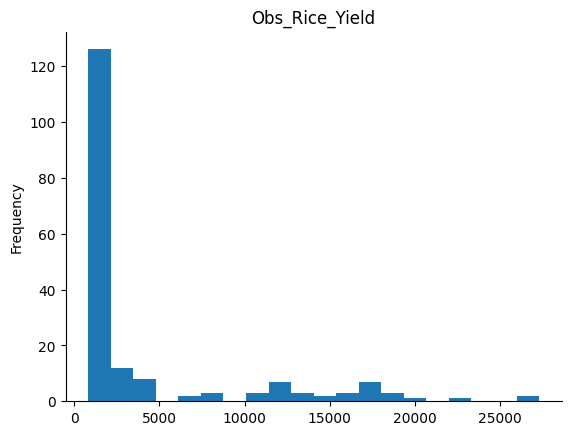

In [7]:
# @title Obs_Rice_Yield

from matplotlib import pyplot as plt
y_pred['Obs_Rice_Yield'].plot(kind='hist', bins=20, title='Obs_Rice_Yield')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
X_test.shape

(183, 28)

In [9]:
y_pred.shape

(183, 1)

(0.0, 30000.0)

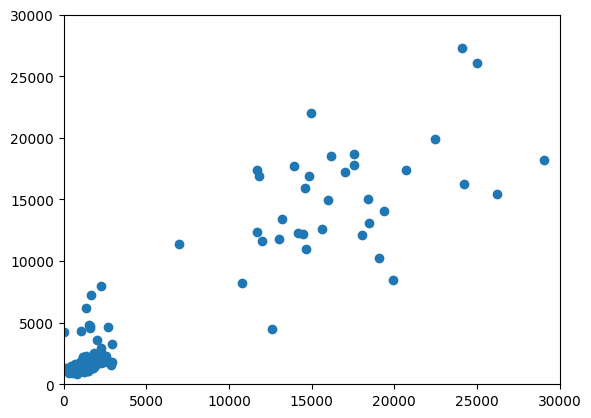

In [10]:
# Create a scatter plot for comparison
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)

# Set axis limits so that both axix are the same
plt.xlim(0, 30000)
plt.ylim(0, 30000)

In [11]:
# Compute RMSE and R-squared
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)  # MSE
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE

r2  = r2_score(y_test, y_pred)

rmse, r2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(2428.144788764964, 0.85716619702159)

# Understanding the Model Results

Feature: Input data that can be used to predict our variable of interest (yield) e.g. cumulative precipitation is a feature that we use to predict yield

SHAP explains how individual predictions are made by a model by deconstructing a prediction into a sum of contributions from each of the model's features

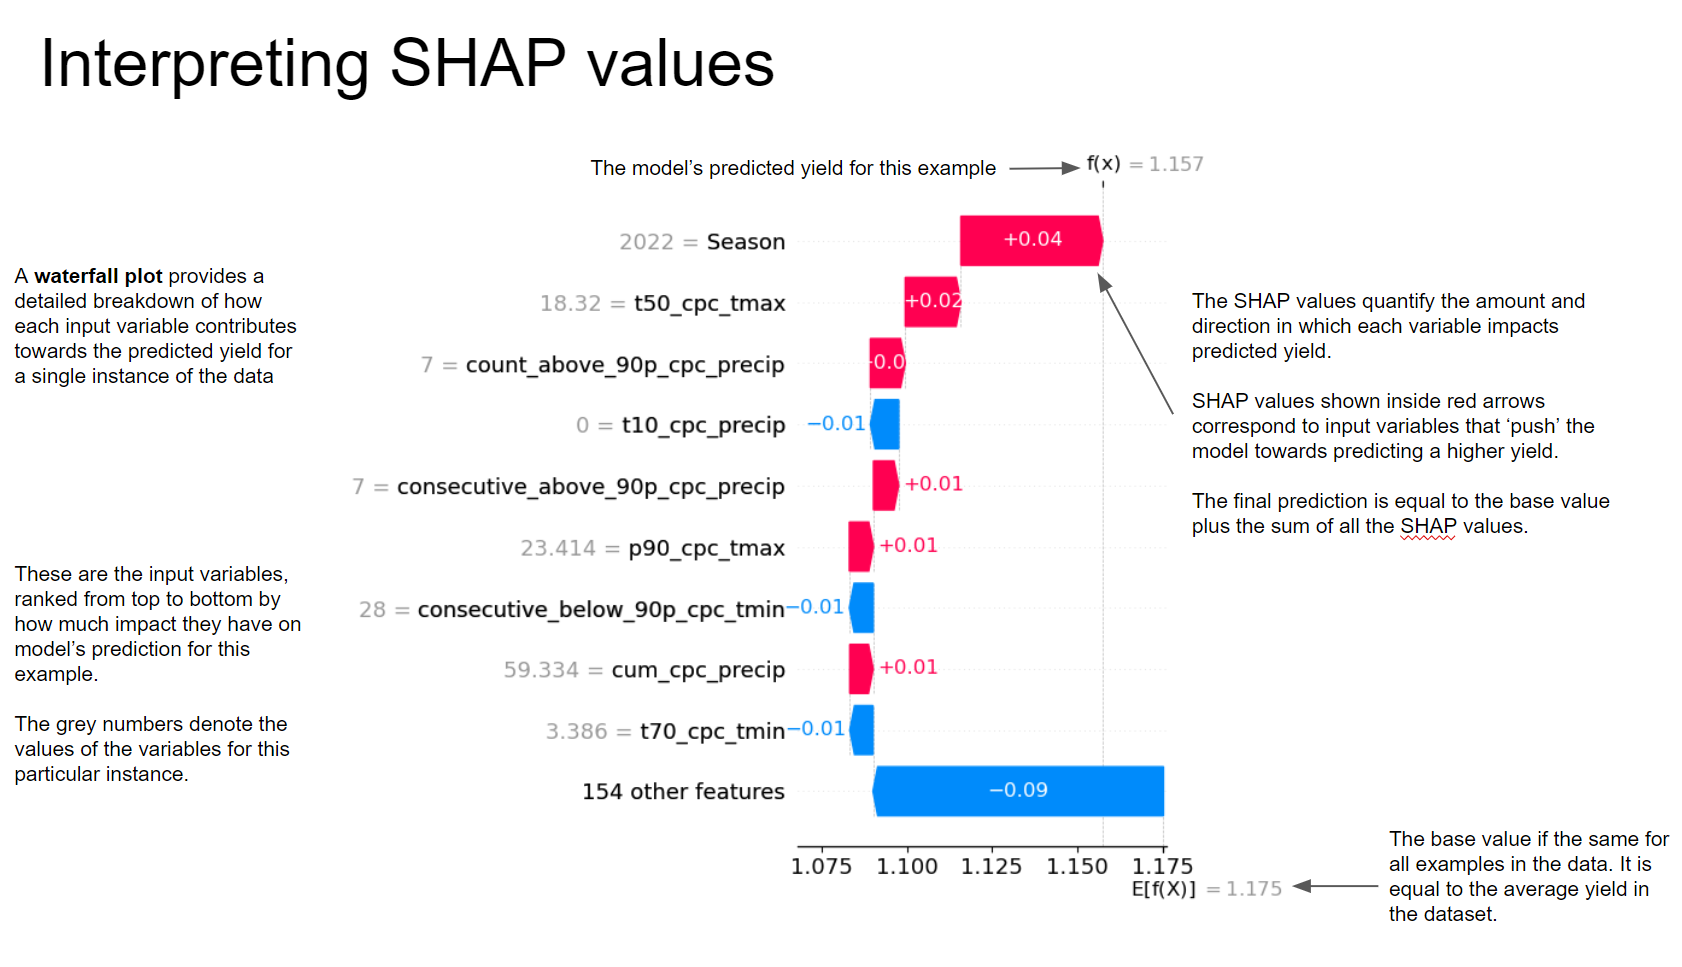

 99%|===================| 182/183 [00:14<00:00]       

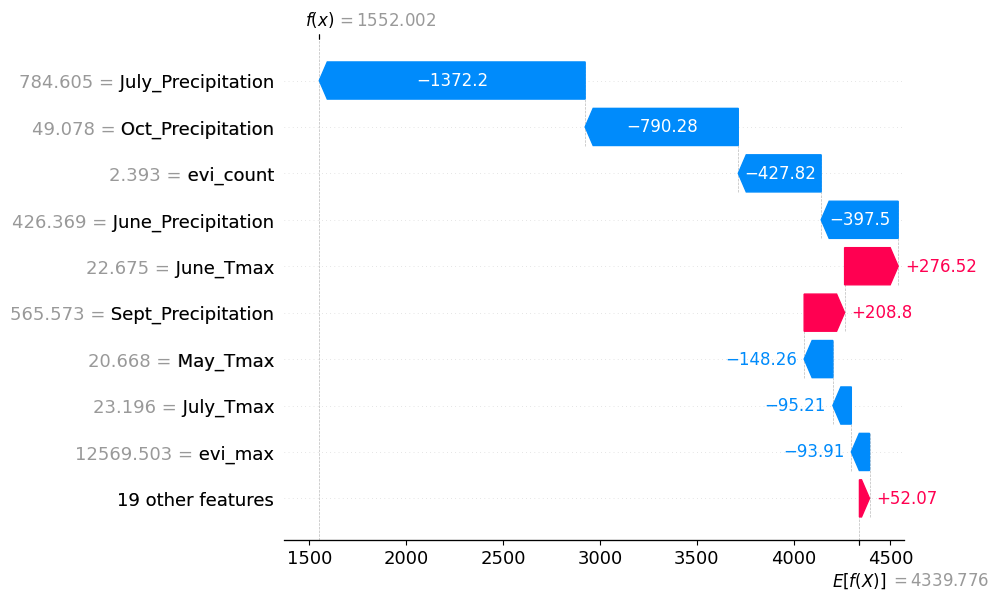

In [12]:
import shap
shap.initjs()

explainer = shap.Explainer(model, X)
shap_values = explainer(test[feature_names])

# visualize the first prediction's explanation
# waterfall plots: https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/waterfall.html
shap.plots.waterfall(shap_values[0])

# Beeswarm plot
The x position of the dot is determined by the impact of that feature on model output, and dots “pile up” along each feature row to show density. Color is used to display the original value of a feature

In this case, high values of ndvi and esi_4wk increase crop yields and vice versa.

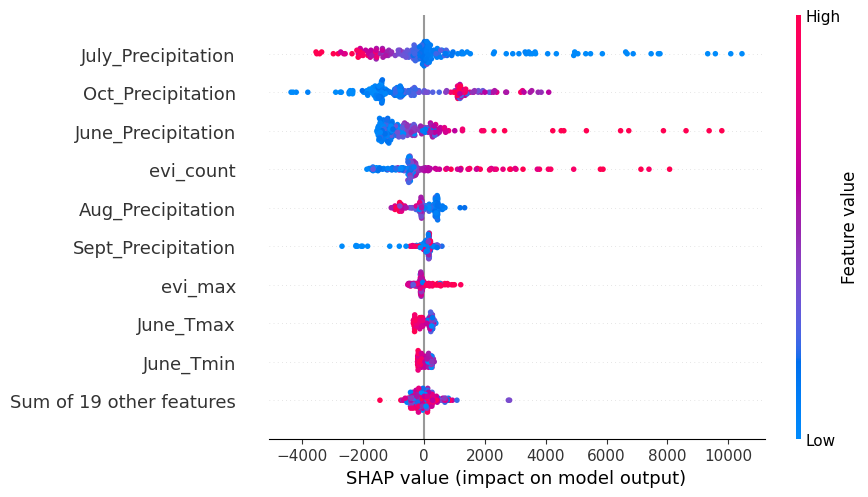

In [13]:
# https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/beeswarm.html
shap.plots.beeswarm(shap_values)

In [14]:
from sklearn.inspection import permutation_importance

# The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled
# https://scikit-learn.org/stable/modules/permutation_importance.html
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=feature_names)

Text(0, 0.5, 'Mean accuracy decrease')

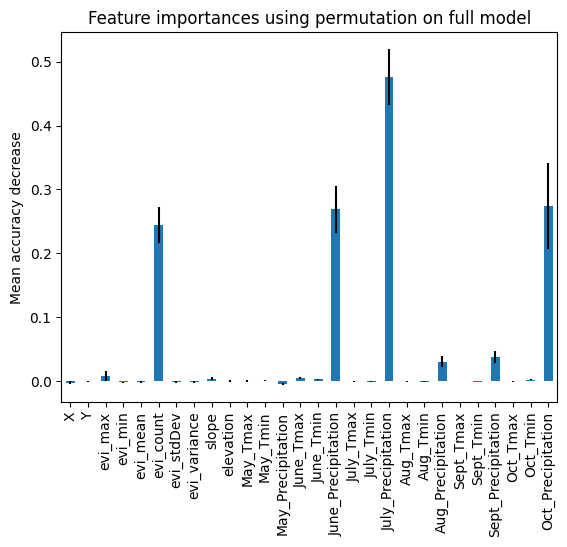

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")

In [16]:
from shapash.explainer.smart_explainer import SmartExplainer
xpl = SmartExplainer(model=model)

xpl.compile(
    x=test[feature_names],
    y_pred=y_pred
)

INFO: Shap explainer type - <shap.explainers._tree.TreeExplainer object at 0x7ee0eeeb44c0>


In [17]:
xpl.plot.features_importance()

In [18]:
# A feature contribution plot answers questions about how a feature value influences model outcomes
xpl.plot.contribution_plot("evi_count")

In [19]:
# A feature contribution plot answers questions about how a feature value influences model outcomes
xpl.plot.contribution_plot("evi_max")

In [20]:
# A feature contribution plot answers questions about how a feature value influences model outcomes
xpl.plot.contribution_plot("July_Precipitation")

In [21]:
# The plot shows features each contributing to push the model output from the base value
# (the average model output over the training dataset we passed) to the model output.
summary_df = xpl.to_pandas()
summary_df

,Obs_Rice_Yield,feature_1,value_1,contribution_1,feature_2,value_2,contribution_2,feature_3,value_3,contribution_3,...,contribution_25,feature_26,value_26,contribution_26,feature_27,value_27,contribution_27,feature_28,value_28,contribution_28
40,1552.002297,July_Precipitation,784.604907,-1507.588965,evi_count,2.392866,-767.938096,Oct_Precipitation,49.078127,-605.342045,...,-3.686295,July_Tmax,23.196229,-2.978501,Aug_Tmax,23.817588,1.651938,slope,0.311107,-0.03856
120,1342.316637,July_Precipitation,964.241759,-1704.78503,evi_count,5.103164,-741.946041,June_Tmax,29.689097,-286.594784,...,-8.615952,X,90.0,-4.789319,Oct_Tmax,27.628865,3.040106,slope,0.312966,1.143438
418,1126.330471,July_Precipitation,638.81904,-1349.387678,evi_count,1.640302,-1298.22402,Oct_Precipitation,97.964704,-397.907996,...,2.170448,Oct_Tmin,15.896815,1.515263,July_Tmax,25.718932,1.283955,Oct_Tmax,26.18627,0.370357
864,2207.786539,evi_count,1.583185,-1732.351393,June_Precipitation,223.041959,-632.254248,July_Precipitation,261.867935,-542.133315,...,5.561987,May_Tmax,21.212944,5.346184,evi_variance,2649332.407,-3.845601,July_Tmax,24.141719,2.729554
464,1237.137633,July_Precipitation,604.251154,-1221.051829,evi_count,3.640252,-844.66861,Oct_Precipitation,48.742091,-598.698518,...,-5.500998,slope,0.293486,1.520532,Oct_Tmax,22.197264,-0.821594,Aug_Tmax,25.194606,-0.369516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1110.796899,July_Precipitation,527.231272,-1088.117005,Oct_Precipitation,67.387881,-1031.088963,evi_count,2.128992,-844.44813,...,-5.712579,Sept_Tmax,26.348467,-3.759363,evi_min,9517.985685,1.692878,Oct_Tmax,26.496276,-0.378257
410,4685.253949,Oct_Precipitation,17.964721,-4697.976961,evi_count,9.179946,3318.352349,July_Precipitation,151.80405,2241.02773,...,17.99185,Aug_Tmax,19.278904,-17.645322,Aug_Tmin,10.672455,17.611529,July_Tmax,19.29217,6.296269
699,1535.226291,Oct_Precipitation,39.444952,-1127.472701,evi_count,2.040819,-869.677511,June_Precipitation,201.041201,-776.721373,...,-2.532112,Aug_Tmax,19.170868,-1.073746,Aug_Tmin,10.031515,0.589501,July_Tmin,9.30829,-0.08009
246,1398.136426,Oct_Precipitation,67.834325,-1084.109988,evi_count,1.331479,-902.431932,June_Precipitation,295.898969,-794.251289,...,-4.511103,July_Tmin,17.542565,4.350504,Sept_Tmin,16.840093,-2.258029,slope,0.321058,0.513147


In [22]:
# The plot shows features each contributing to push the model output from the base value
# (the average model output over the training dataset we passed) to the model output.
xpl.plot.local_plot(row_num=12)

In [23]:
# xpl.run_app()
xpl.plot.top_interactions_plot(nb_top_interactions=5)

Assigned readings
Please read any one of the papers below and summarize them in a slide deck and answer these questions:


*   Main objective and findings of the paper
*   Geography and crops (if any) covered in the paper
*   Which model(s) are used?
*   Which model offers the best performance in the paper.
*   If you are unfamiliar with the model, that is ok, you do not need to explain the model itself?
*   How do the authors perform validation of their results?
Your assessment of the strenghts and weaknesses of the paper.
https://www.medrxiv.org/content/10.1101/2021.06.23.21259419v1
https://cs.stanford.edu/~ermon/website/papers/jiaxuan_AAAI17.pdf
https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0252402
https://www.mdpi.com/2072-4292/11/15/1768

Optional practice questions


1.   Choose atleast 5 new new machine learning features of your choice. For inspiration, you can look at the tsfresh library and the features listed on that page: https://tsfresh.readthedocs.io/en/latest/text/list_of_features.html
2.   Using these new features, updated the crop yield model, and run it for random forests and mixed effect random forest models.
3. Compare the outputs from these 2 models using an error metric like MAPE or MAE (https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics). Which model works better?
4. Use the feature importances and shapash library to understand and analyze your results. Do the results make intuitive sense?
